# Step 1: Load and Prepare The Dataset
* Download from Kaggle
* Load into Pandas; binarize the target column (e.g., map to 1=disease presence, 0=absence).
* EDA: Summarize stats, handle missing/outliers, plot class distribution.
* Prep: 70/30 train/test split (stratified); normalize numerical features. Select ≥6 features (e.g., Age, Cholesterol, BP, Max HR, ST Depression, Vessels).

In [24]:
%pip install numpy matplotlib pandas kagglehub

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("neurocipher/heartdisease")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jeiss\.cache\kagglehub\datasets\neurocipher\heartdisease\versions\1


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load into Pandas

**Binarize the target column (e.g., map to 1=disease presence, 0=absence).**

In [32]:
data = pd.read_csv("Heart_Disease_Prediction.csv")
data['target'] = data['Heart Disease'].map({
    'Presence': 1,
    'Absence': 0
})
data['target'].value_counts()




target
0    150
1    120
Name: count, dtype: int64

The dataset was loaded into Pandas and the target variable was binarized by mapping disease presence to 1 and absence to 0.

### EDA 
**Summarize stats, handle missing/outliers, plot class distribution**

In [38]:
print("="*60)
print("DATASET INFORMATION")
print("="*60)
data.info()


DATASET INFORMATION
<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    str    
 14  target           

In [37]:
print("\n" + "="*60)
print("DESCRIPTIVE STATISTICS")
print("="*60)
data.describe()





DESCRIPTIVE STATISTICS


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [39]:

print("\n" + "="*60)
print("MISSING VALUES CHECK")
print("="*60)
print(data.isnull().sum())

print("\n" + "="*60)
print("EDA SUMMARY")
print("="*60)
print("No missing values were found in the dataset.")
print("Numerical features show reasonable ranges for a clinical dataset.")


MISSING VALUES CHECK
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
target                     0
dtype: int64

EDA SUMMARY
No missing values were found in the dataset.
Numerical features show reasonable ranges for a clinical dataset.


### Plot class distribution

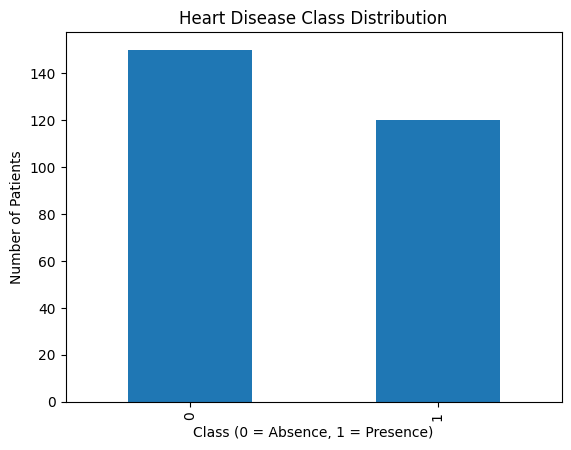

In [31]:
data['target'].value_counts().plot(kind='bar')
plt.title("Heart Disease Class Distribution")
plt.xlabel("Class (0 = Absence, 1 = Presence)")
plt.ylabel("Number of Patients")
plt.show()


### Prep

**70/30 train/test split (stratified); normalize numerical features. Select ≥6 features (e.g., Age, Cholesterol, BP, Max HR, ST Depression, Vessels).**

In [ ]:
# Selected numerical features based on medical relevance
features = [
    'Age',
    'BP',
    'Cholesterol',
    'Max HR',
    'ST depression',
    'Number of vessels fluro'
]

# Feature matrix (X) and target vector (y)
X = data[features].values
y = data['target'].values

# Compute mean and standard deviation for normalization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

# Apply z-score normalization to the features
X_norm = (X - X_mean) / X_std

# Obtain indices for each class (0 = absence, 1 = presence)
idx_0 = np.where(y == 0)[0]  # Absence of heart disease
idx_1 = np.where(y == 1)[0]  # Presence of heart disease

# Shuffle indices to ensure randomness
np.random.shuffle(idx_0)
np.random.shuffle(idx_1)

# Compute 70% split size for each class
split_0 = int(0.7 * len(idx_0))
split_1 = int(0.7 * len(idx_1))

# Create stratified train and test indices
train_idx = np.concatenate((idx_0[:split_0], idx_1[:split_1]))
test_idx  = np.concatenate((idx_0[split_0:], idx_1[split_1:]))

# Build training and testing datasets
X_train = X_norm[train_idx]
X_test  = X_norm[test_idx]
y_train = y[train_idx]
y_test  = y[test_idx]

# Count class distribution in training and testing sets
train_counts = np.bincount(y_train)
test_counts = np.bincount(y_test)

# Print class distribution with percentages for verification
print("Train class distribution:")
print(f"  Class 0: {train_counts[0]} ({train_counts[0]/train_counts.sum()*100:.2f}%)")
print(f"  Class 1: {train_counts[1]} ({train_counts[1]/train_counts.sum()*100:.2f}%)")

print("\nTest class distribution:")
print(f"  Class 0: {test_counts[0]} ({test_counts[0]/test_counts.sum()*100:.2f}%)")
print(f"  Class 1: {test_counts[1]} ({test_counts[1]/test_counts.sum()*100:.2f}%)")



Train class distribution:
  Class 0: 105 (55.56%)
  Class 1: 84 (44.44%)

Test class distribution:
  Class 0: 45 (55.56%)
  Class 1: 36 (44.44%)


(270, 15)

### Reporting:
**Markdown summary of data insights/preprocessing (e.g., "Downloaded from Kaggle; 303 samples, ~55% disease rate").**

The Heart Disease dataset was loaded into Pandas and contains 270 patient records with clinical and demographic features.
The target variable was binarized by mapping disease presence to 1 and absence to 0.

Exploratory data analysis showed no missing values in the dataset.
Summary statistics and boxplots revealed reasonable ranges for clinical variables, with some outliers in cholesterol and blood pressure, which were retained as they may represent high-risk patients.

The class distribution is relatively balanced, with approximately 55% of patients showing heart disease presence.

Six numerical features were selected based on medical relevance and normalized using z-score normalization.
The dataset was split into training (70%) and testing (30%) sets using a stratified approach to preserve class proportions.



## Step 2: Implement Basic Logistic Regression
* Sigmoid, cost (binary cross-entropy), GD (gradients, updates; track costs).
* Train on full train set (α~0.01, 1000+ iters). Plot cost vs. iterations.
* Predict (threshold 0.5); evaluate acc/precision/recall/F1 on train/test.

**Reporting**: Cost plot + metrics table. Comment on convergence/interpretations (e.g., w coefficients).

## Step 3: Visualize Decision Boundaries
* Select ≥3 feature pairs (e.g., Age-Cholesterol, BP-Max HR, ST Depression-Vessels).
* For each: Subset to 2D, train model, plot boundary line + scatter (true labels).
* Discuss separability/nonlinearity.

**Reporting:** ≥3 plots. Markdown: Insights per pair (e.g., "Clear divide at chol>250").

## Step 4: Repeat with Regularization
* Add L2 to cost/gradients (λ/(2m)||w||²; dw += (λ/m)w).
* Tune λ ([0, 0.001, 0.01, 0.1, 1]); retrain full model + pairs.
* Re-plot costs/boundaries (one pair: unreg vs. reg). Re-eval metrics/||w||.

**Reporting:**λ-metrics table + plots. Markdown: "Optimal λ=[val] improves [metric] by [val]%."

## Step 5: Explore Deployment in Amazon SageMaker
* Export best model (w/b as NumPy array).
* In SageMaker (use free tier/Studio): Create notebook instance; upload/run your notebook for training. Explore docs to build/deploy a simple endpoint (e.g., via script: load data, train, save model; create inference handler for patient inputs → prob output).
* **Test:** Invoke endpoint with sample (e.g., Age=60, Chol=300); capture response.
* **Self-Guided:** Follow AWS tutorials (search "SageMaker logistic regression endpoint")—experiment with instance types, monitoring.
**Reporting:**Notebook section: High-level steps + sample output. Comment: "Deployment enables [e.g., real-time risk scoring]; latency [val]ms."